In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [5]:
x,y = make_moons(100,noise=0.25, random_state=2)

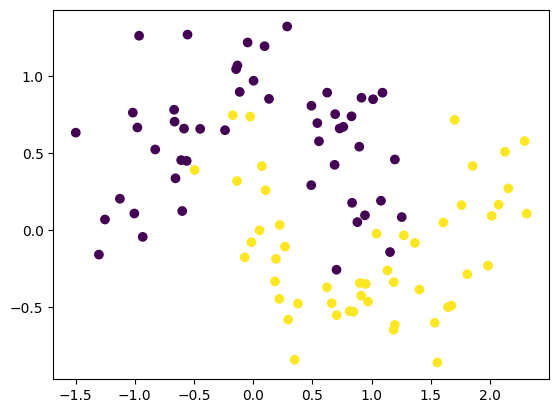

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [24]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam , metrics=['accuracy'])
history=model.fit(x,y,epochs=2000,validation_split=0.2)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.5281 - loss: 0.6497 - val_accuracy: 0.9000 - val_loss: 0.3621
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8547 - loss: 0.4194 - val_accuracy: 0.9000 - val_loss: 0.2130
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8523 - loss: 0.3843 - val_accuracy: 0.9000 - val_loss: 0.2209
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8352 - loss: 0.4067 - val_accuracy: 0.9000 - val_loss: 0.2236
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8430 - loss: 0.3558 - val_accuracy: 0.9000 - val_loss: 0.2548
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8781 - loss: 0.3128 - val_accuracy: 0.9000 - val_loss: 0.2415
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8508 - loss: 0.3384 - val_accuracy: 0.9000 - val_loss: 0.2398
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8250 - loss: 0.3434 - val_accuracy: 0.9000 - 

plot shows overfitting

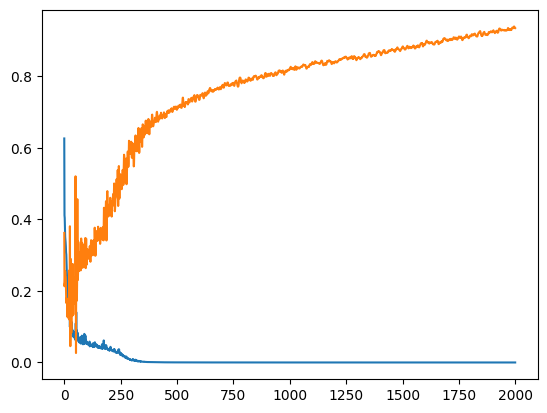

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Added L2 regularization and the setting the hyperparameter value of lamda to 0

In [26]:
model_regularization = Sequential()
model_regularization.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.L2(0.03)))
model_regularization.add(Dense(128,activation='relu', kernel_regularizer = tensorflow.keras.regularizers.L2(0.001)))
model_regularization.add(Dense(1,activation='sigmoid'))

adam=Adam(learning_rate=0.01)
model_regularization.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history_regularization = model_regularization.fit(x,y,epochs=2000,verbose=0, validation_split=0.2)


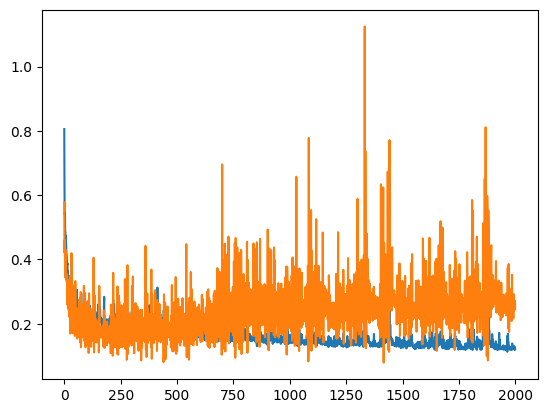

In [27]:
plt.plot(history_regularization.history['loss'])
plt.plot(history_regularization.history['val_loss'])